# Insert CSV file into SQL# 

In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.show_versions()

C:\Users\Andre\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.11.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19045
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : pt_BR.cp1252

pandas           : 2.0.3
numpy            : 1.24.3
pytz             : 2023.3.post1
dateutil         : 2.8.2
setuptools       : 68.0.0
pip              : 23.2.1
Cython           : None
pytest           : 7.4.0
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.15.0
pandas_datareader: None
bs4              : 4.12.2
bottleneck       : 1.

In [4]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [5]:
import traceback

try:
    import mysql.connector
except:
    !pip install mysql-connector-python
    import mysql.connector

"mysql.connector.__version__: " + mysql.connector.__version__

'mysql.connector.__version__: 8.3.0'

In [6]:
try:
    cnx = mysql.connector.connect(
        user='meec1',
        password='00meec',
        host='127.0.0.1', # in your case replace by 'localhost'
        database='teste_ipma_pt'
    )
except mysql.connector.Error as e:
    print(f"problems opening the connection to mysql: {e}")
else:
    print("ok!")
    cnx.close()

ok!


In [7]:
from config1 import config as conf

try:
    cnx = mysql.connector.connect(**conf)
except mysql.connector.Error as e:
    print(f"problems opening the connection to mysql: {e.msg}")
else :
    print("ok!")
    cnx.close()

ok!


In [29]:
Evap_df = pd.read_csv("Evapotranspiracao - et0-0810-olhao.csv")
Precip_df = pd.read_csv("precipitation-total - mrrto-0810-olhao.csv")
TempMax_df = pd.read_csv("temperature-max - mtxmx-0810-olhao.csv")
TempMin_df = pd.read_csv("temperature-min - mtnmn-0810-olhao.csv")

In [9]:
Evap_df.head()
Precip_df.head()
TempMax_df.head()
TempMin_df.head()

,date,minimum,maximum,range,mean,std
0,2023-11-26,6.658678,8.622467,1.963789,7.597668,0.522169
1,2023-11-27,9.028960,10.473711,1.444751,9.730518,0.355348
2,2023-11-28,10.690369,12.261875,1.571507,11.366214,0.439112
3,2023-11-29,15.265903,16.050070,0.784166,15.619434,0.216013
4,2023-11-30,14.593349,15.913609,1.320259,15.259802,0.355413


In [28]:
## to drop unnecessary columns
#cols = ['minimum','maximum','range','mean','std']
#df.drop(cols, inplace=True, axis = 1)
#df.head()

In [10]:
# Check for missing values
Evap_df.isnull().sum()
Precip_df.isnull().sum()
TempMax_df.isnull().sum()
TempMin_df.isnull().sum()

date       0
minimum    0
maximum    0
range      0
mean       0
std        0
dtype: int64

In [11]:
#Handle data types
Evap_df.dtypes

date        object
minimum    float64
maximum    float64
range      float64
mean       float64
std        float64
dtype: object

In [12]:
#Converting date object into dateTime
Evap_df['date'] = pd.to_datetime(Evap_df['date'])
Precip_df['date'] = pd.to_datetime(Precip_df['date'])
TempMax_df['date'] = pd.to_datetime(TempMax_df['date'])
TempMin_df['date'] = pd.to_datetime(TempMin_df['date'])

In [51]:
#Eliminando id's problematicos
#Evap_df.sort_values(by='maximum', ascending=False)   ## Nao foram encontradas discrepancias a serem consideradas
#Precip_df.sort_values(by='maximum', ascending=False)   ## Nao foram encontradas discrepancias a serem consideradas
#TempMax_df.sort_values(by='maximum', ascending=False)   ## Nao foram encontradas discrepancias a serem consideradas
#TempMin_df.sort_values(by='maximum', ascending=False)   ## Nao foram encontradas discrepancias a serem consideradas

#problematic_idx = Evap_df[meteo_df['maximum']>50].index
#problematic_idx


In [14]:
#pip install mysqlclient


SyntaxError: invalid syntax (1092101305.py, line 1)

In [32]:
##Adicionando dados de Evapotranspiracao ao DB
import csv
import MySQLdb


with open("Evapotranspiracao - et0-0810-olhao.csv",'r') as file:
    reader = csv.reader(file)

    connection = MySQLdb.connect(host="localhost",user="meec1",password="00meec",db='teste_ipma_pt')

    cursor = connection.cursor()
    
    for row in reader:
        cursor.execute('''INSERT INTO `evapotranspiracao` (`id`, `date`,`minimum`, `maximum`, `range`, `mean`, `std`) VALUES (DEFAULT, %s, %s, %s, %s, %s, %s)''',row)
        
        connection.commit()
cursor.close()

connection.close()

In [16]:
##Adicionando dados de Evapotranspiracao ao DB

with open("precipitation-total - mrrto-0810-olhao.csv",'r') as file:
    reader = csv.reader(file)

    connection = MySQLdb.connect(host="localhost",user="meec1",password="00meec",db='teste_ipma_pt')

    cursor = connection.cursor()
    
    for row in reader:
        cursor.execute('''INSERT INTO `precipitation_total` (`idPrecip`, `date`,`minimum`, `maximum`, `range`, `mean`, `std`) VALUES (DEFAULT, %s, %s, %s, %s, %s, %s)''',row)
        
        connection.commit()
cursor.close()

connection.close()

In [17]:
##Adicionando dados de Temperatura maxima ao DB

with open("temperature-max - mtxmx-0810-olhao.csv",'r') as file:
    reader = csv.reader(file)

    connection = MySQLdb.connect(host="localhost",user="meec1",password="00meec",db='teste_ipma_pt')

    cursor = connection.cursor()
    
    for row in reader:
        cursor.execute('''INSERT INTO `temperature_max` (`idTempMax`, `date`,`minimum`, `maximum`, `range`, `mean`, `std`) VALUES (DEFAULT, %s, %s, %s, %s, %s, %s)''',row)
        
        connection.commit()
cursor.close()

connection.close()

In [18]:
##Adicionando dados de Temperatura minima ao DB

with open("temperature-min - mtnmn-0810-olhao.csv",'r') as file:
    reader = csv.reader(file)

    connection = MySQLdb.connect(host="localhost",user="meec1",password="00meec",db='teste_ipma_pt')

    cursor = connection.cursor()
    
    for row in reader:
        cursor.execute('''INSERT INTO `temperature_min` (`idTempMin`, `date`,`minimum`, `maximum`, `range`, `mean`, `std`) VALUES (DEFAULT, %s, %s, %s, %s, %s, %s)''',row)
        
        connection.commit()
cursor.close()

connection.close()

<Axes: >

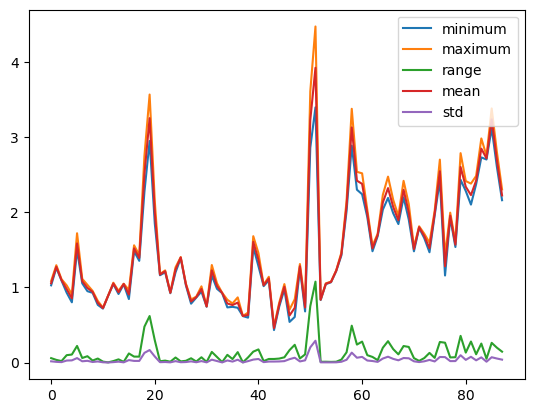

In [30]:
#generic plot
Evap_df.plot()

<Axes: xlabel='date'>

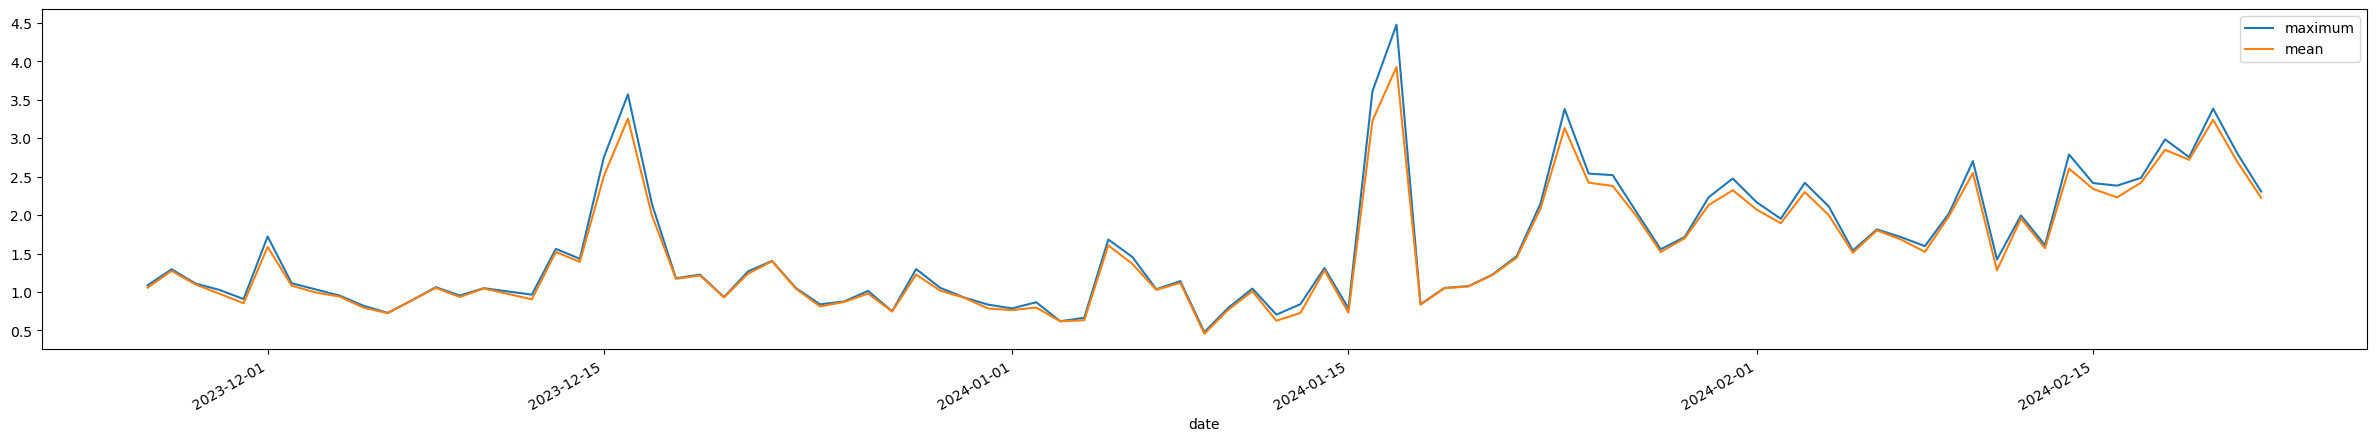

In [20]:
#detailed plot Evapotranspiracao 
Evap_df[['maximum', 'mean', 'date']].set_index('date').plot(figsize=(30, 5))

<Axes: xlabel='date'>

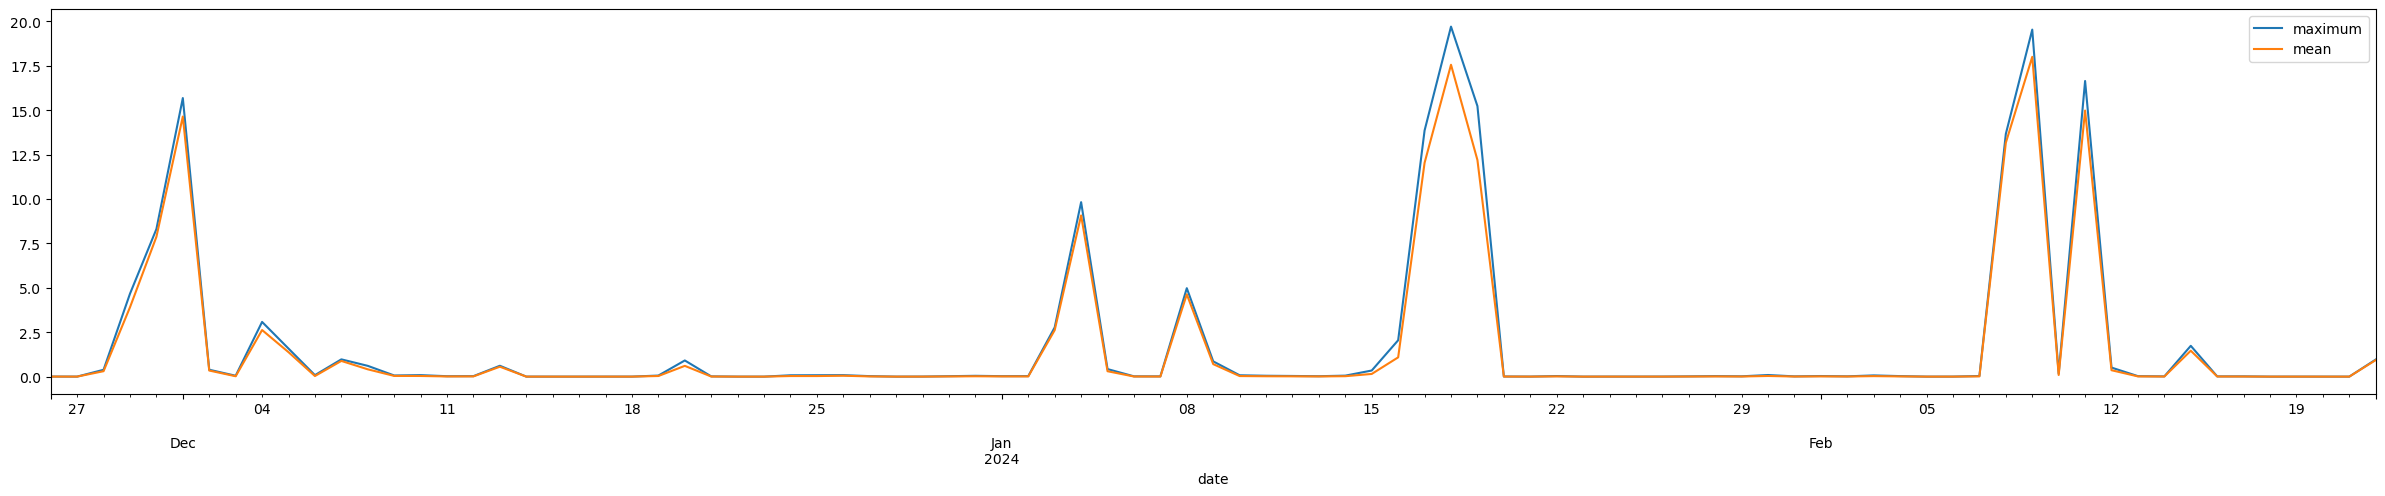

In [21]:
#detailed plot Precipitacao 
Precip_df[['maximum', 'mean', 'date']].set_index('date').plot(figsize=(30, 5))

<Axes: xlabel='date'>

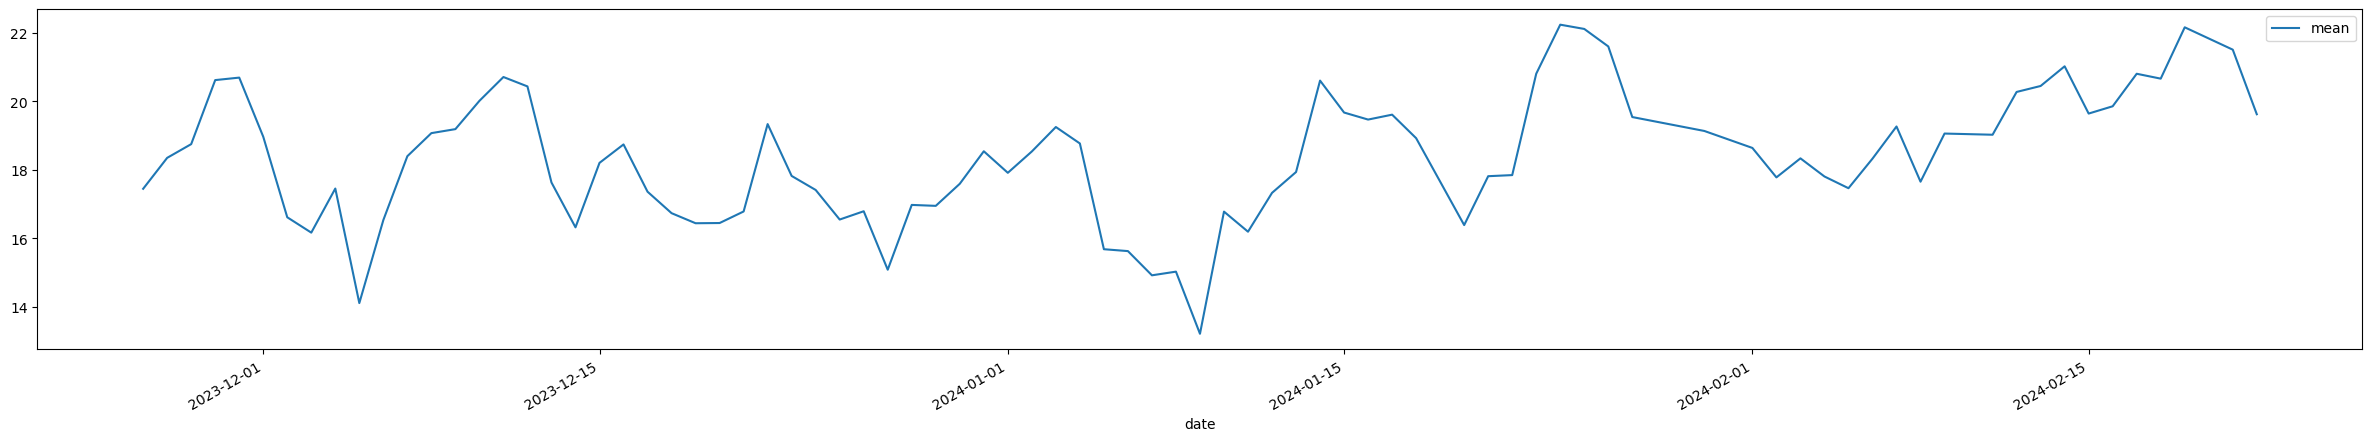

In [22]:
#detailed plot Temperatura maxima 
TempMax_df[['mean', 'date']].set_index('date').plot(figsize=(30, 5))

<Axes: xlabel='date'>

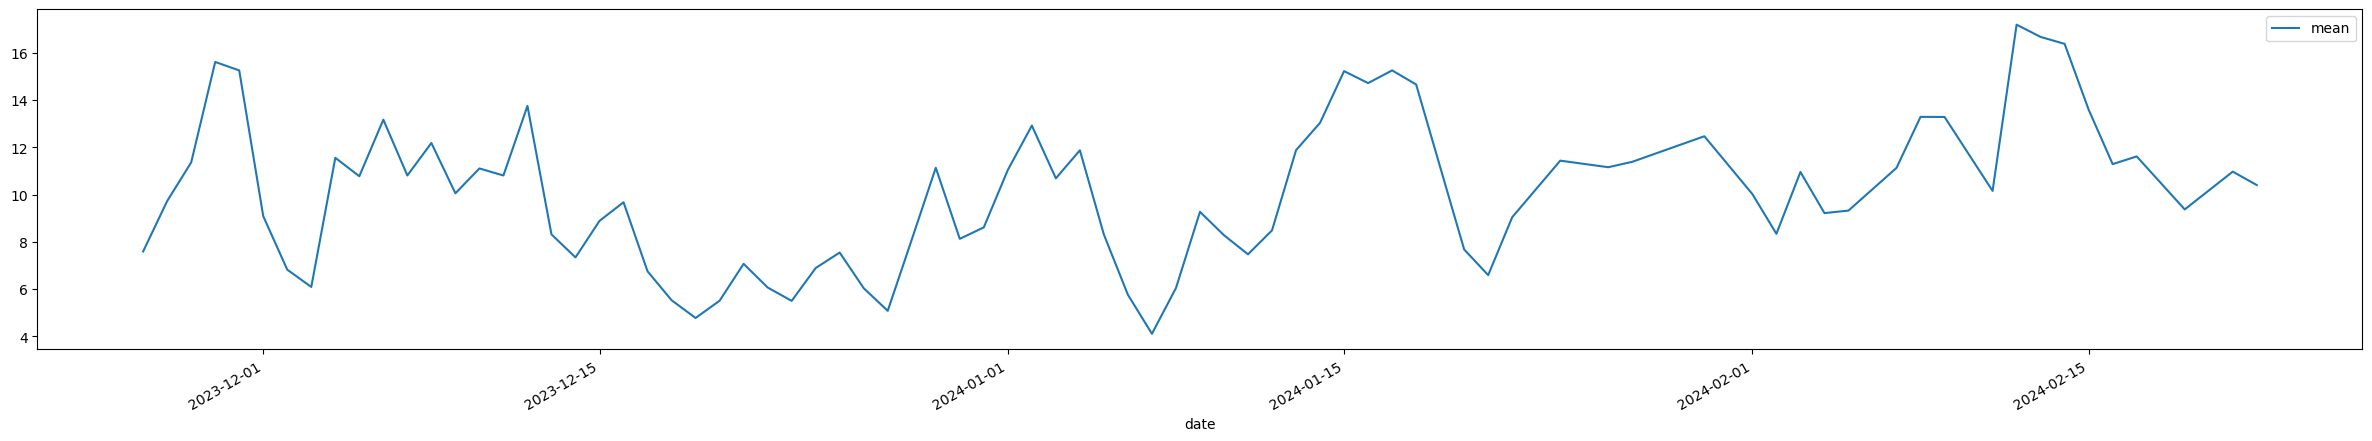

In [23]:
#detailed plot Temperatura Minima 
TempMin_df[['mean', 'date']].set_index('date').plot(figsize=(30, 5))

In [24]:
def plot_histogram_and_normal_dist(df, column, bins=10):

    mean = Evap_df[column].mean()
    std = Evap_df[column].std()

    normal_dist = np.random.normal(mean, std, 10000)

    Evap_df[column].plot(kind='hist', figsize=(15,5), bins=bins, density=True, alpha=0.5, color='red', title=f'Evapotranspiracao_Histogram of a normal distribution and "{column}" which has has a swewness of {Evap_df[column].skew():.2f} and a kurtosis of {Evap_df[column].kurt():.2f}')
    plt.hist(normal_dist, bins=2*bins, density=True, alpha=0.5, color='blue')


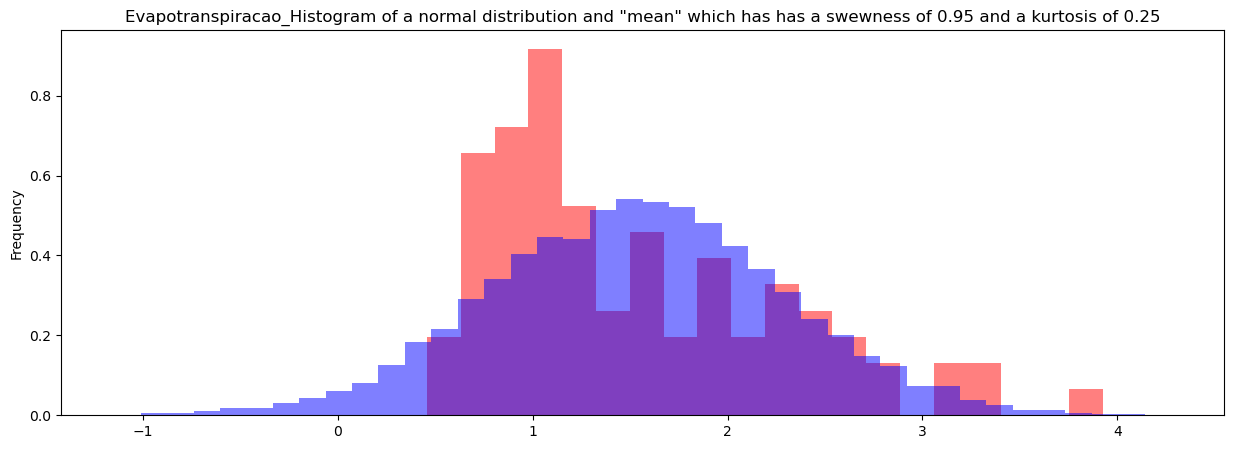

In [25]:
# Assimetria e curtose dos dados de Evapotranspiracao

#Assimetria pode ser vista a esquerda da media (desvios da media)
#Curtose representa o grau de achatamento da distribuição
plot_histogram_and_normal_dist(Evap_df, 'mean', bins=20)


In [26]:
def plot_histogram_and_normal_dist(df, column, bins=10):

    mean = Precip_df[column].mean()
    std = Precip_df[column].std()

    normal_dist = np.random.normal(mean, std, 10000)

    Precip_df[column].plot(kind='hist', figsize=(15,5), bins=bins, density=True, alpha=0.5, color='red', title=f'Precipitacao_Histogram of a normal distribution and "{column}" which has has a swewness of {Precip_df[column].skew():.2f} and a kurtosis of {Precip_df[column].kurt():.2f}')
    plt.hist(normal_dist, bins=2*bins, density=True, alpha=0.5, color='blue')


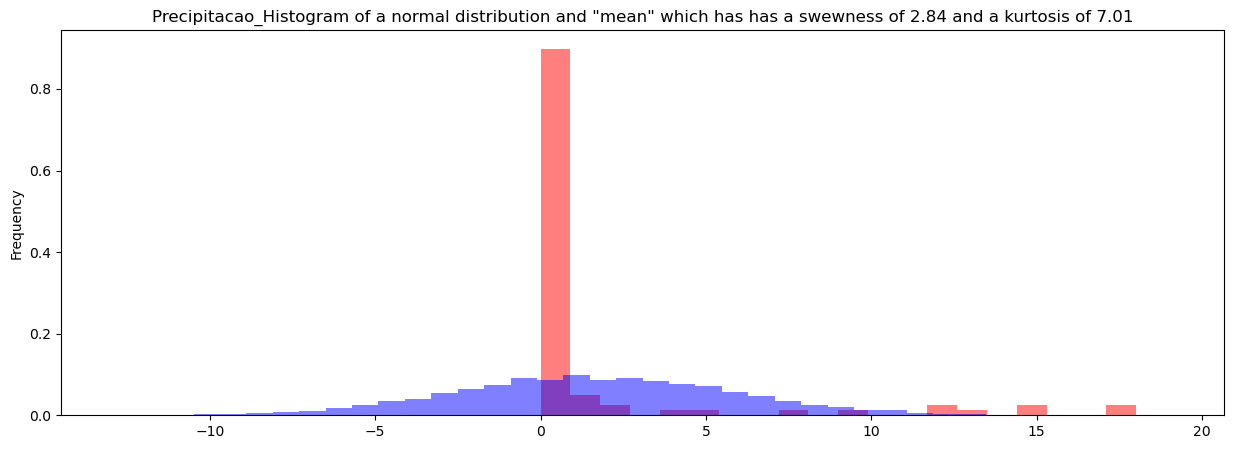

In [27]:
# Assimetria e curtose dos dados de Precipitacao

#Assimetria pode ser vista a esquerda da media (desvios da media)
#Curtose representa o grau de achatamento da distribuição
plot_histogram_and_normal_dist(Precip_df, 'mean', bins=20)